In [41]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [42]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df.shape

(1470, 35)

In [44]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(1470, 35)

# EDA
## 1. Null/NaN

In [45]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Note 1: Observations:
- Shape 1470 * 35
- "Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime" as object are Object in Data frame
- No Null values
- Classification model will be applied



In [47]:
df.nunique().to_frame("No of unique values")

No of unique values
Age                                        43
Attrition                                   2
BusinessTravel                              3
DailyRate                                 886
Department                                  3
DistanceFromHome                           29
Education                                   5
EducationField                              6
EmployeeCount                               1
EmployeeNumber                           1470
EnvironmentSatisfaction                     4
Gender                                      2
HourlyRate                                 71
JobInvolvement                              4
JobLevel                                    5
JobRole                                     9
JobSatisfaction                             4
MaritalStatus                               3
MonthlyIncome                            1349
MonthlyRate                              1427
NumCompaniesWorked                         10
Over18                                      1
OverTime                                    2
PercentSalaryHike                          15
PerformanceRating                           2
RelationshipSatisfaction                    4
StandardHours                               1
StockOptionLevel                            4
TotalWorkingYears                          40
TrainingTimesLastYear                       7
WorkLifeBalance                             4
YearsAtCompany                             37
YearsInCurrentRole                         19
YearsSinceLastPromotion                    16
YearsWithCurrManager                       18

In [48]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Numerical Columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']




Note3: EmployeeNumber,EmployeeCount,Over18, StandardHours can be dropped as well as it has unique values.

In [49]:
columns_to_drop=["EmployeeNumber","Over18"]
df = df.drop(columns_to_drop, axis=1)


In [50]:
df.shape

(1470, 33)

# 2. Label Encoder

In [51]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeCount  EnvironmentSatisfaction  ...  \
0             2             1.0              1                        2  ...   
1             1             1.0              1                        3  ...   
2             2             4.0              1                        4  ...   
3             4             1.0              1                        4  ...   
4             1             3.0              1                        1  ...   
...         ...             ...            ...                      ...  ...   
1465          2             3.0              1                        3  ...   
1466          1             3.0              1                        4  ...   
1467          3             1.0              1                        2  ...   
1468          3             3.0              1                        4  ...   
1469          3             3.0              1                        2  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...        

# 3. Skewness, Outliars (We donot remove Skewness and Outliars from cataegorial columns)

In [52]:
df.describe()

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EmployeeCount  \
count       1470.000000  1470.000000     1470.000000         1470.0   
mean           9.192517     2.912925        2.247619            1.0   
std            8.106864     1.024165        1.331369            0.0   
min            1.000000     1.000000        0.000000            1.0   
25%            2.000000     2.000000        1.000000            1.0   
50%            7.000000     3.000000        2.000000            1.0   
75%           14.000000     4.000000        3.000000            1.0   
max           29.000000     5.000000        5.000000            1.0   

       EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
count              1470.000000  ...               1470.000000         1470.0   
mean                  2.721769  ...                  2.712245           80.0   
std                   1.093082  ...                  1.081209            0.0   
min                   1.000000  ...                  1.000000           80.0   
25%                   2.000000  ...                  2.000000           80.0   
50%                   3.000000  ...                  3.000000           80.0   
75%                   4.000000  ...                  4.000000           80.0   
max                   4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 33 columns]

## Note 2: Observations:
- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "BusinessTravel","Education","RelationshipSatisfaction' --> Left Skewed
- Median (50%) < Mean - "DistanceFromHome","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager" -> Right Skewed
- Standard Dev for "DailyRate " is high -> Outliars are present
- Percentile 75% and max : It is there in "Age", "DailyRate","DistanceFromHome","EducationField","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager" - outliars are present

In [53]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

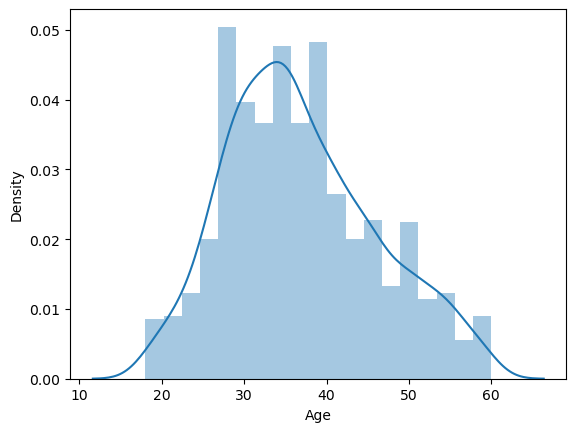

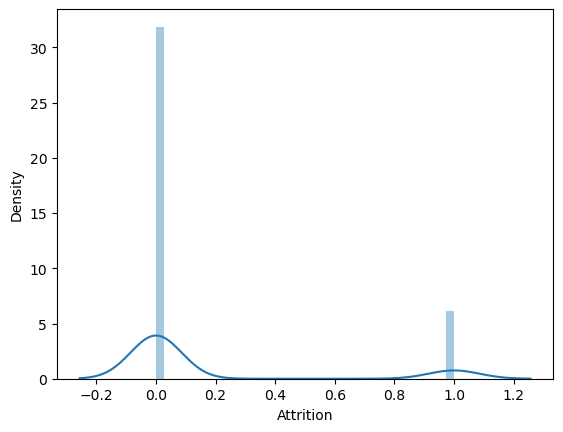

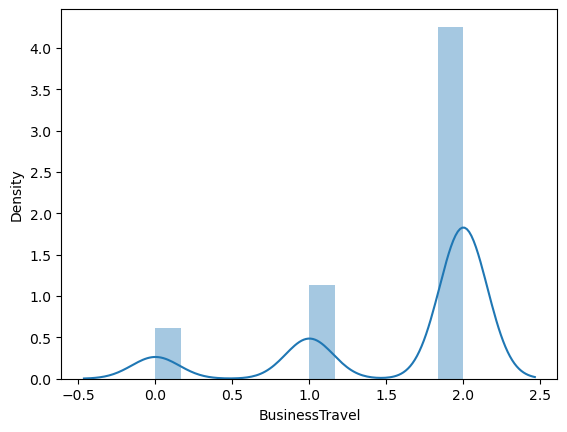

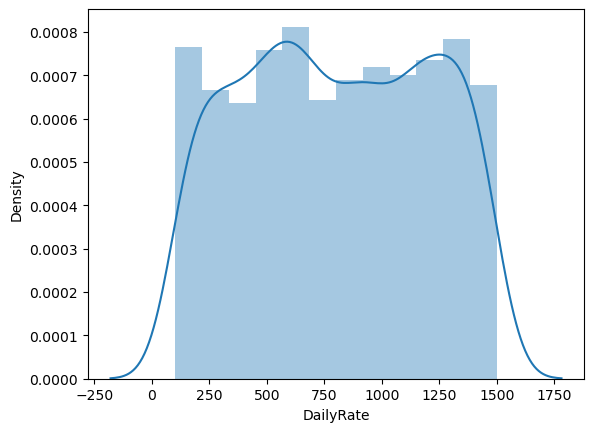

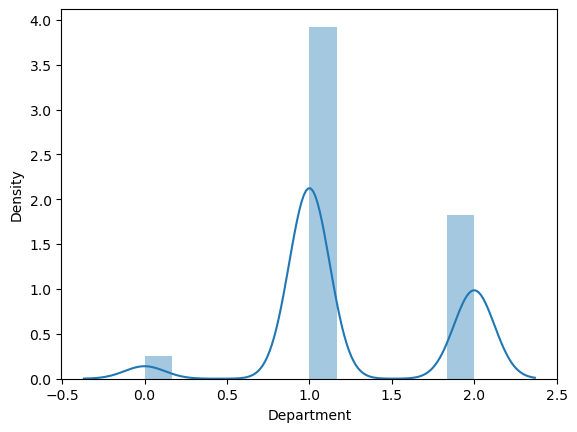

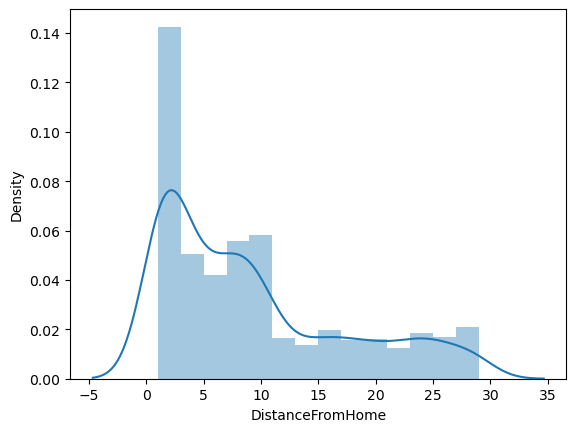

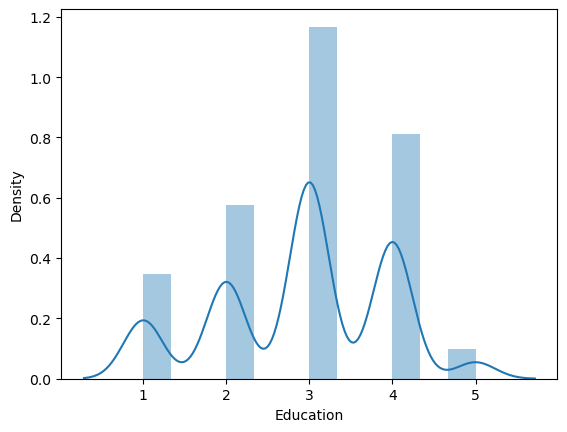

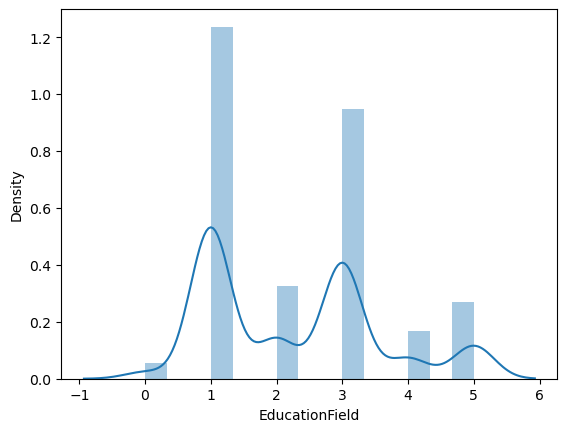

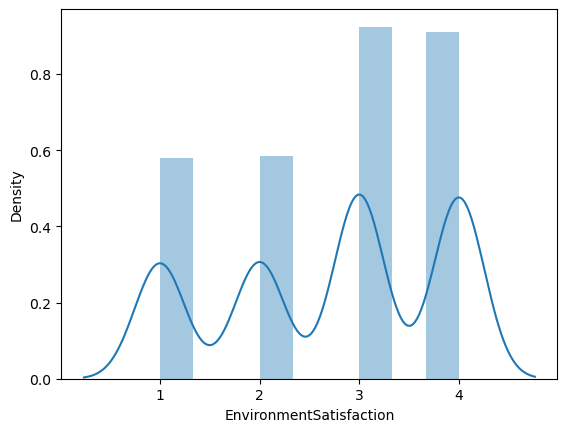

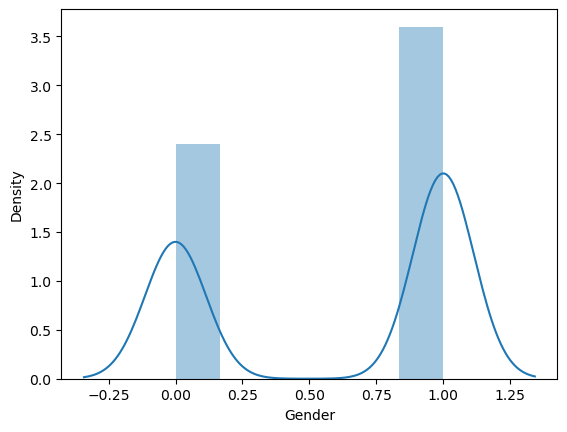

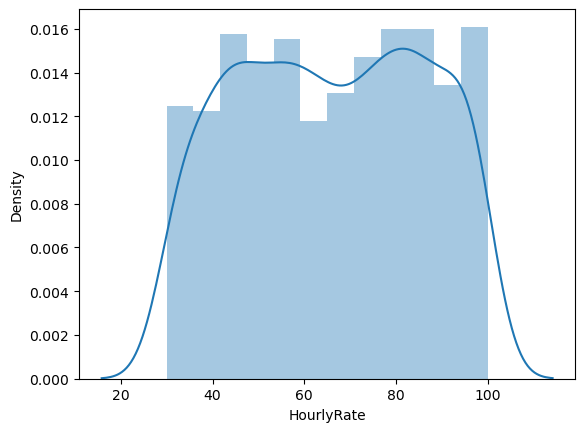

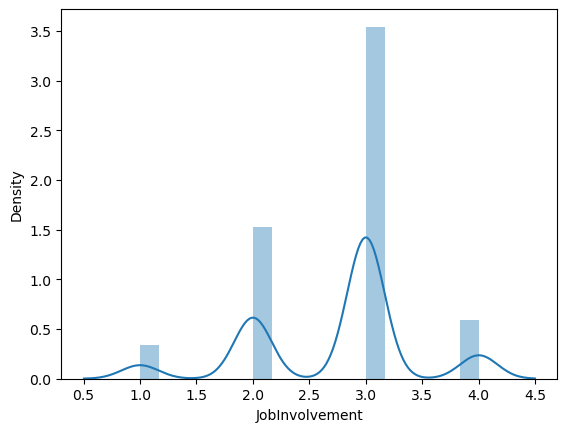

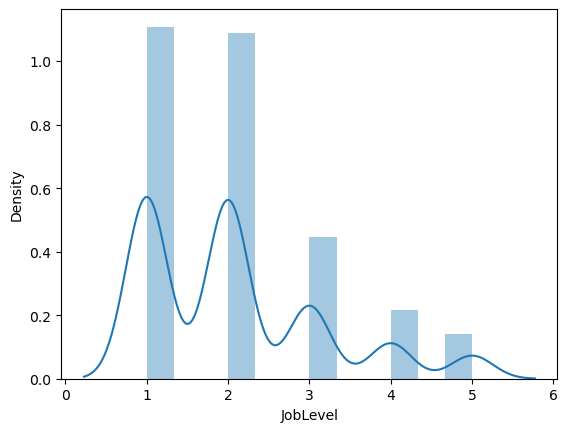

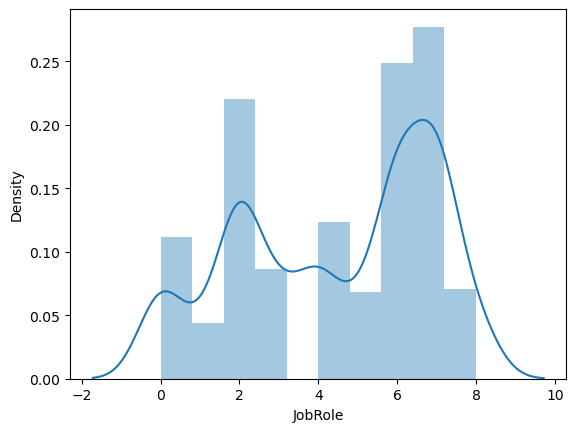

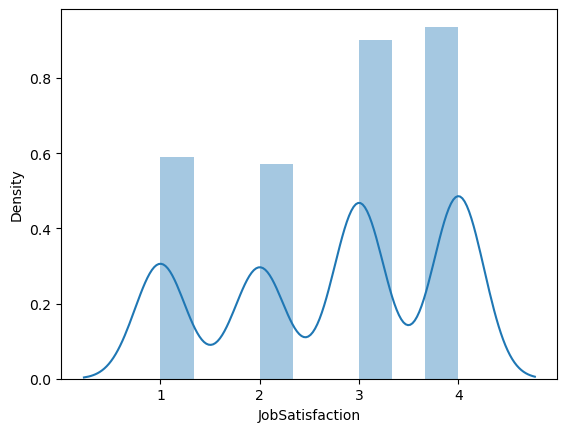

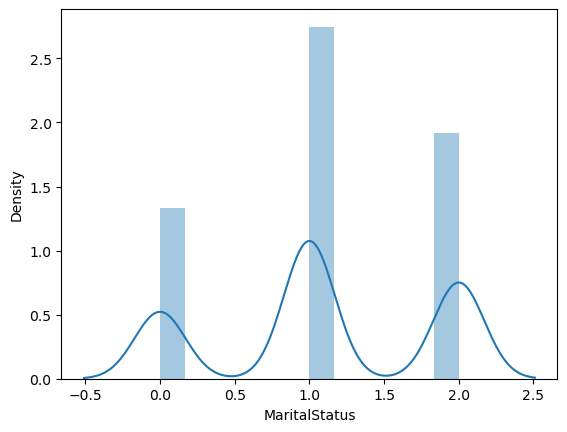

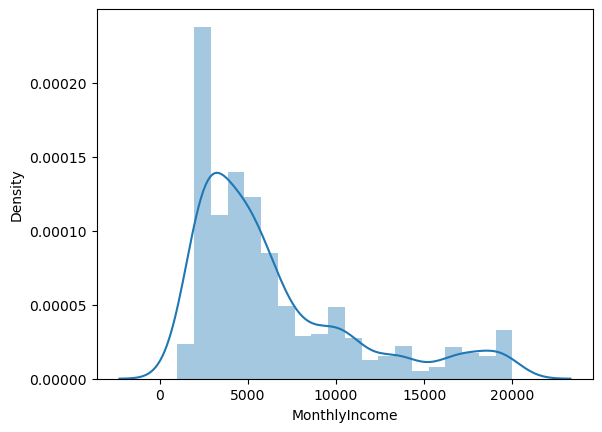

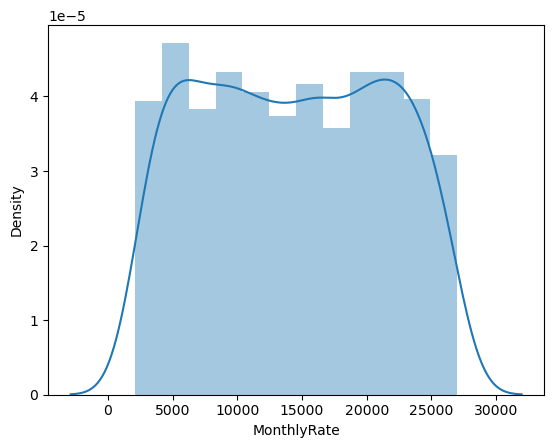

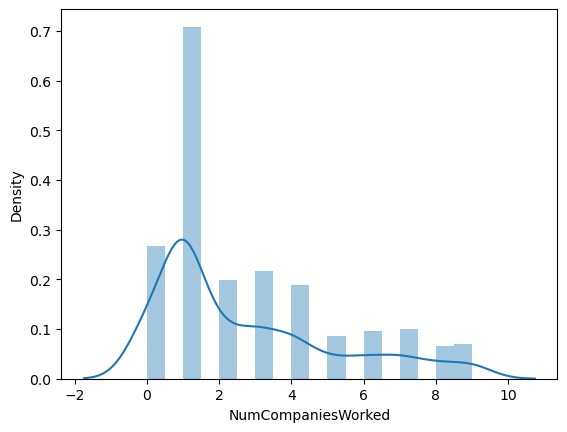

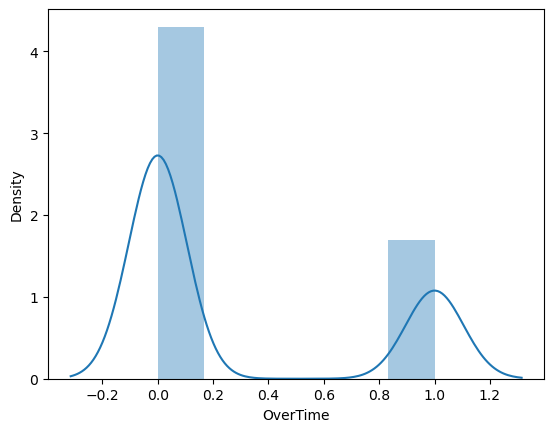

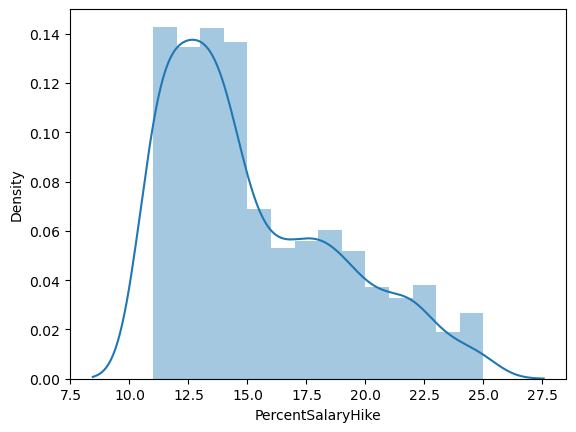

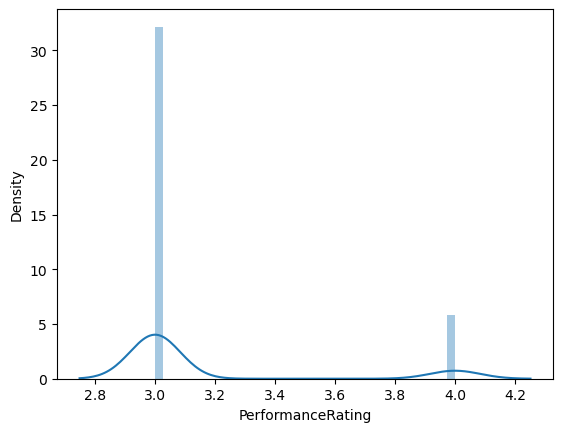

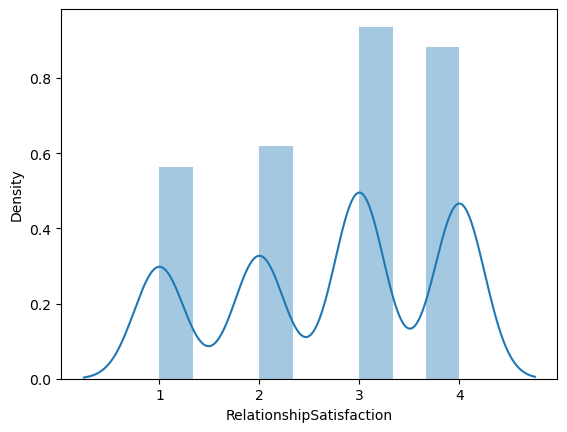

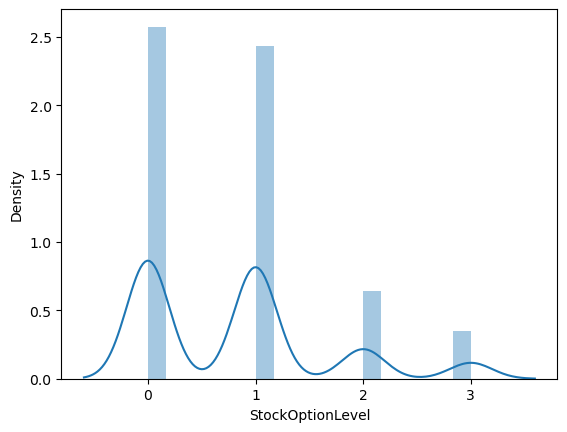

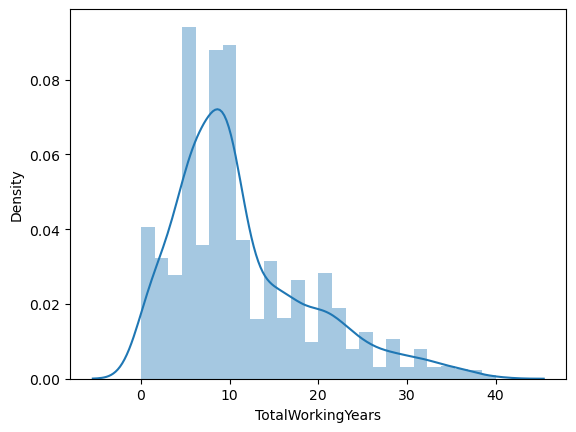

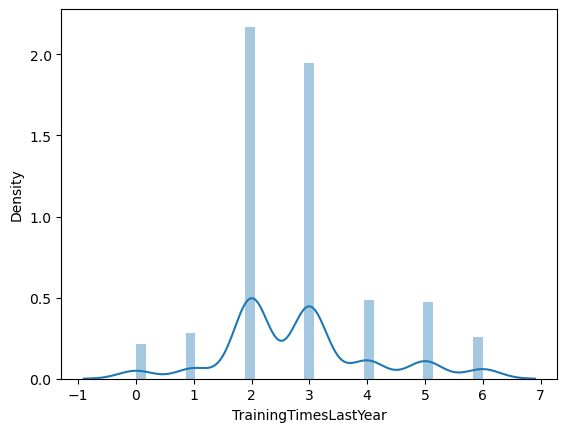

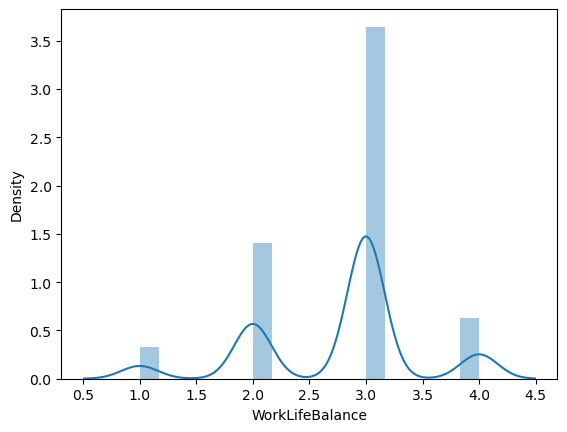

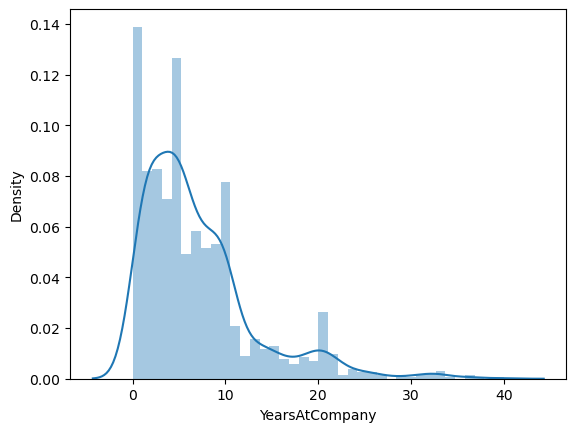

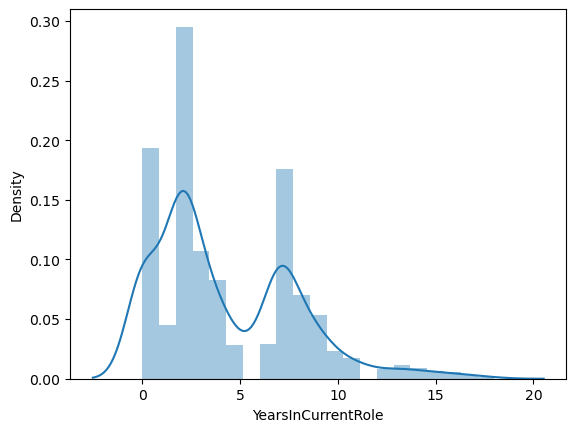

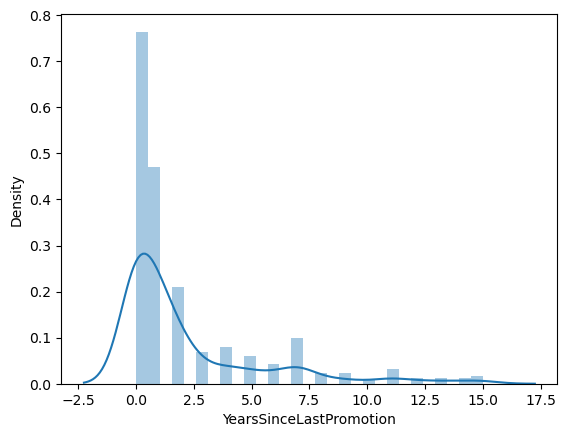

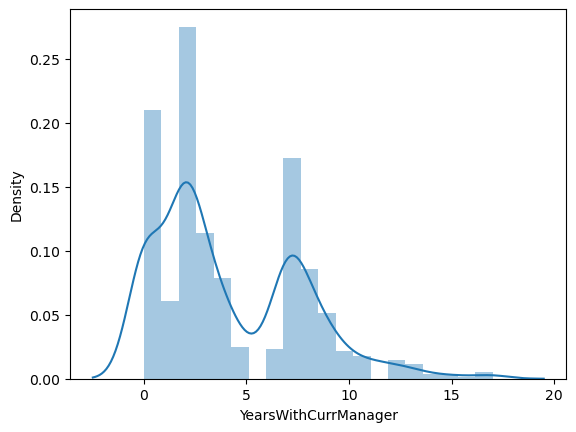

In [166]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

Age                            Axes(0.125,0.825775;0.168478x0.0542254)
Attrition                   Axes(0.327174,0.825775;0.168478x0.0542254)
BusinessTravel              Axes(0.529348,0.825775;0.168478x0.0542254)
DailyRate                   Axes(0.731522,0.825775;0.168478x0.0542254)
Department                     Axes(0.125,0.760704;0.168478x0.0542254)
DistanceFromHome            Axes(0.327174,0.760704;0.168478x0.0542254)
Education                   Axes(0.529348,0.760704;0.168478x0.0542254)
EducationField              Axes(0.731522,0.760704;0.168478x0.0542254)
EmployeeCount                  Axes(0.125,0.695634;0.168478x0.0542254)
EnvironmentSatisfaction     Axes(0.327174,0.695634;0.168478x0.0542254)
Gender                      Axes(0.529348,0.695634;0.168478x0.0542254)
HourlyRate                  Axes(0.731522,0.695634;0.168478x0.0542254)
JobInvolvement                 Axes(0.125,0.630563;0.168478x0.0542254)
JobLevel                    Axes(0.327174,0.630563;0.168478x0.0542254)
JobRol

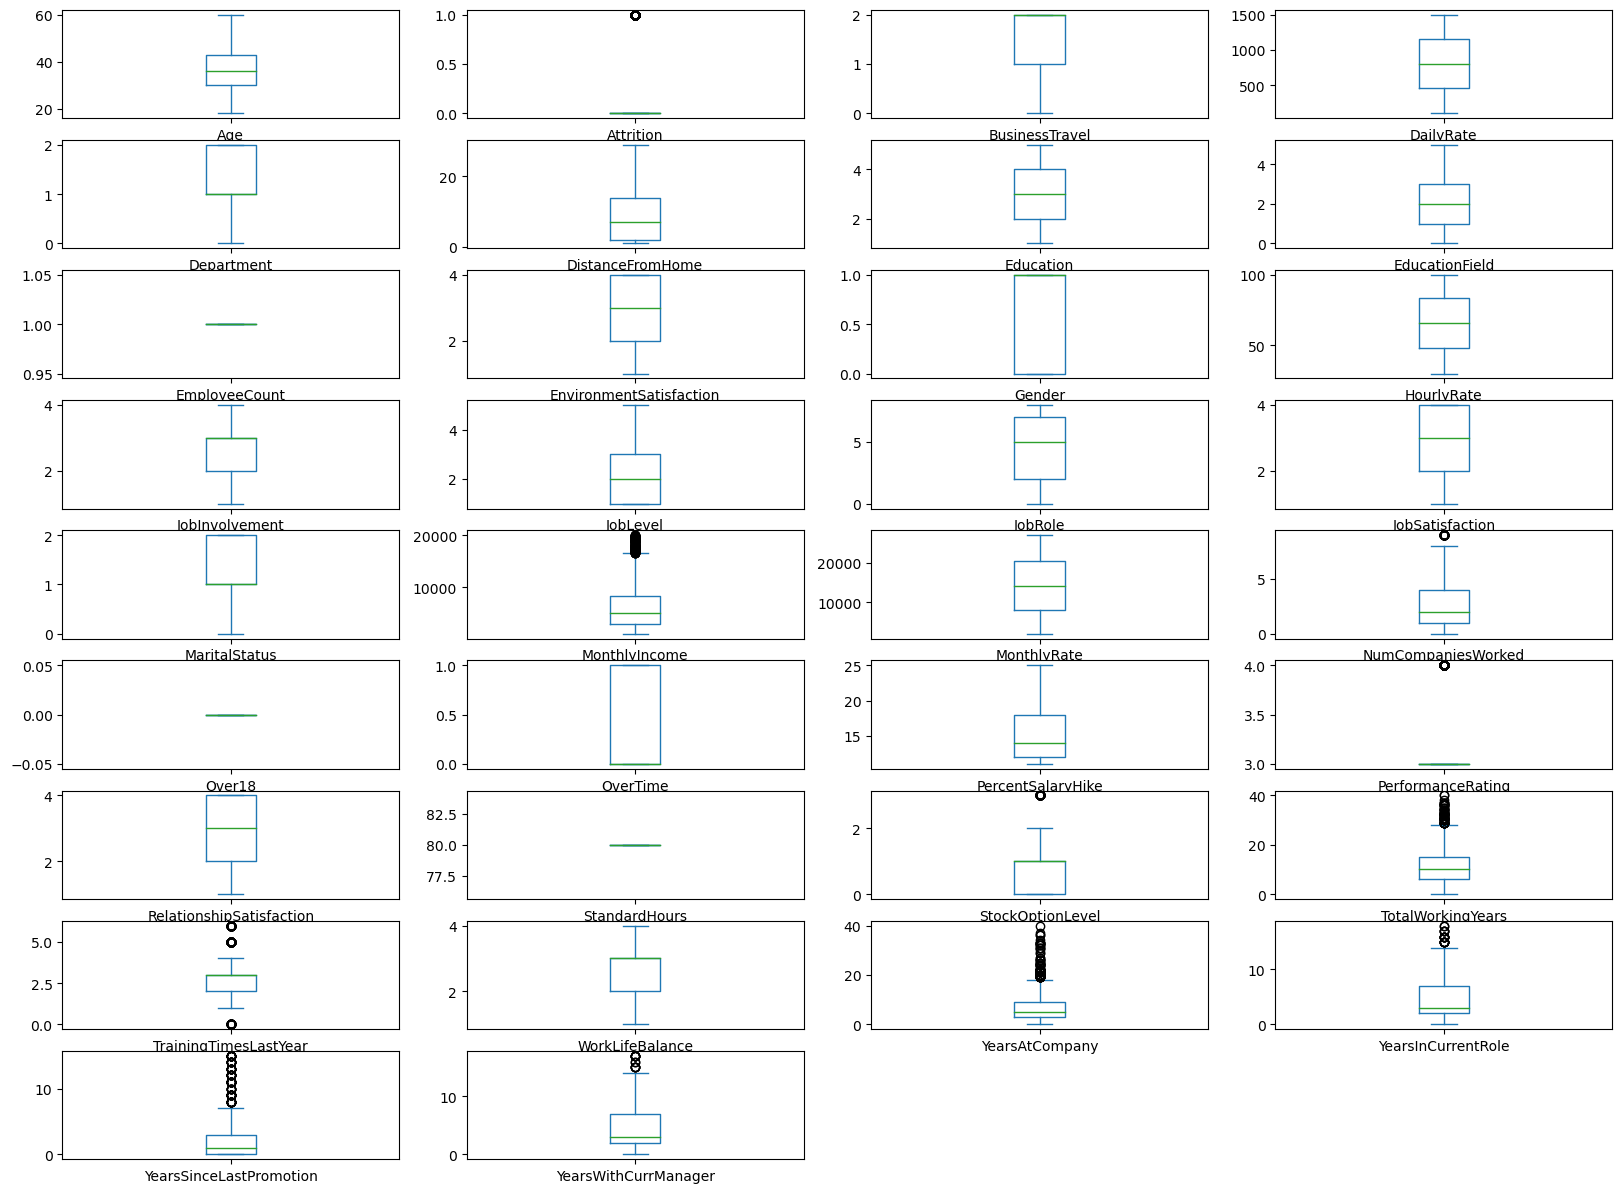

In [13]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

#### - MonthlyIncome, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager has outliares.
#### - Objects are not considerd

In [54]:
from scipy.stats import zscore
ol = ['MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss rate 0.9523809523809524


### Note: Df is changed to df1

# 4. Co- Relation and Multicolinearity

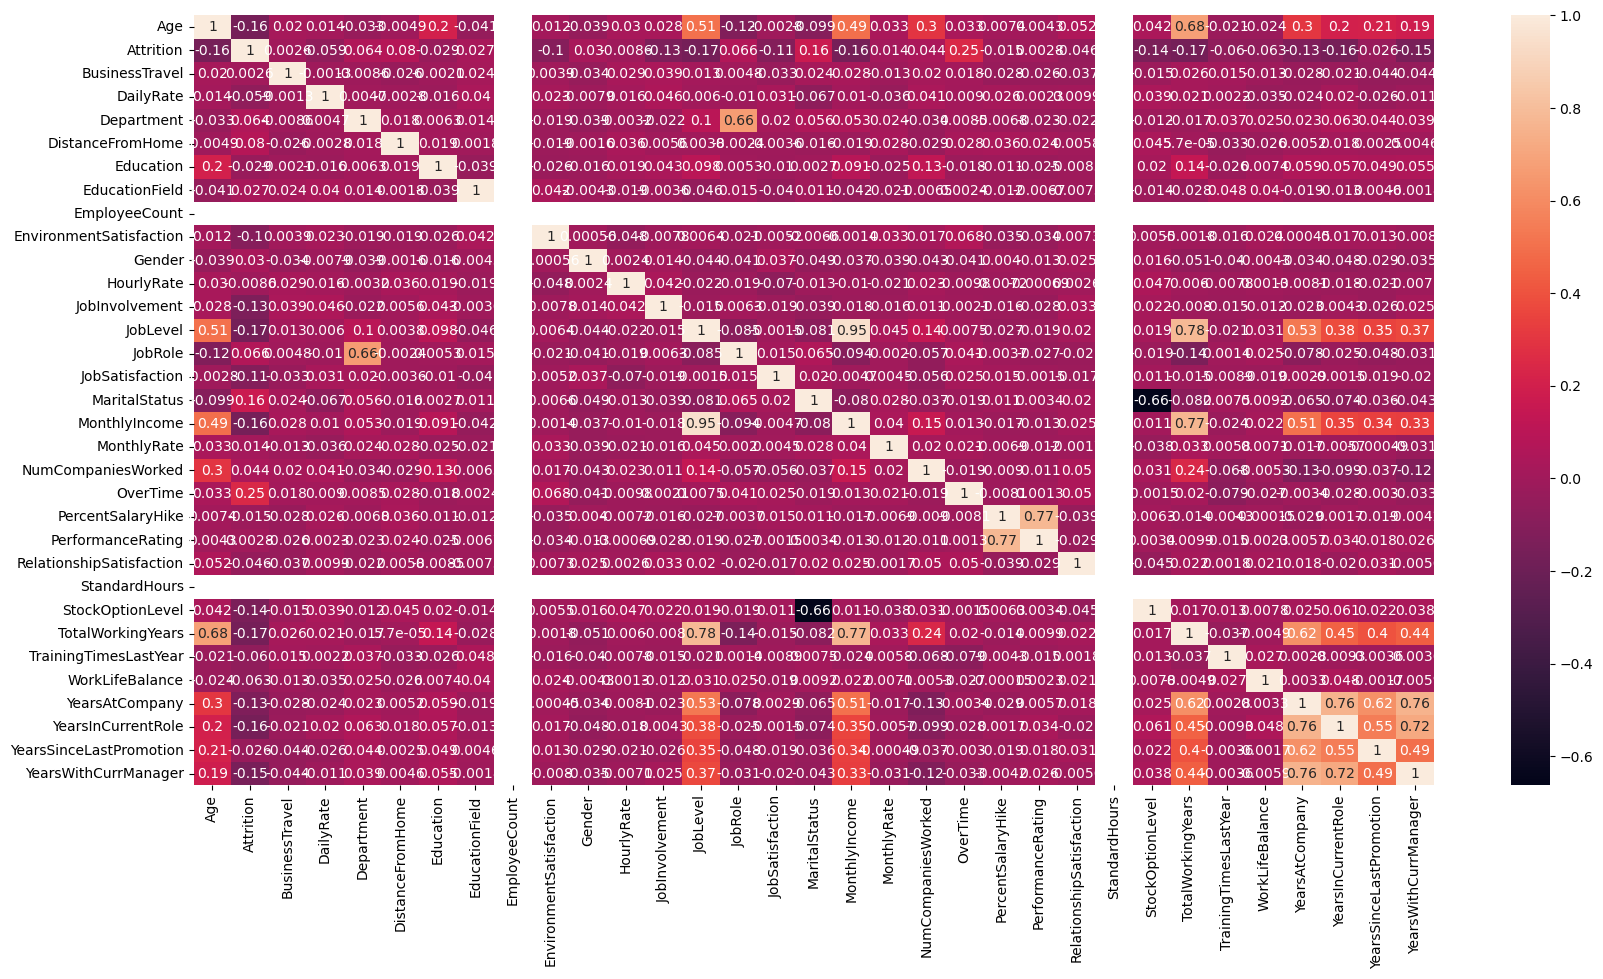

In [55]:
corr_hmap=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [229]:
cor=df1.corr()
cor

Attrition  BusinessTravel  DailyRate  Department  \
Attrition                  1.000000        0.002568  -0.059032    0.063866   
BusinessTravel             0.002568        1.000000  -0.001346   -0.008586   
DailyRate                 -0.059032       -0.001346   1.000000    0.004662   
Department                 0.063866       -0.008586   0.004662    1.000000   
DistanceFromHome           0.079682       -0.026250  -0.002777    0.017830   
Education                 -0.029364       -0.002110  -0.015904    0.006299   
EducationField             0.026650        0.024313   0.039793    0.014169   
EnvironmentSatisfaction   -0.103883        0.003874   0.023147   -0.019102   
Gender                     0.029988       -0.033689  -0.007925   -0.039361   
HourlyRate                -0.008610        0.029034   0.015958   -0.003248   
JobInvolvement            -0.130191        0.038796   0.046201   -0.022190   
JobRole                    0.065902        0.004793  -0.010207    0.664982   
JobSatisfaction           -0.105397       -0.032681   0.030898    0.020123   
MaritalStatus              0.163293        0.023804  -0.066985    0.055553   
MonthlyIncome             -0.157326        0.028022   0.009997    0.053158   
MonthlyRate                0.014244       -0.012825  -0.035596    0.023963   
NumCompaniesWorked         0.044394        0.020149   0.040806   -0.034365   
OverTime                   0.245855        0.018400   0.009048    0.008499   
RelationshipSatisfaction  -0.045535       -0.036959   0.009927   -0.021772   
StockOptionLevel          -0.139036       -0.014827   0.039373   -0.011787   
TotalWorkingYears         -0.166931        0.025574   0.021190   -0.017179   
TrainingTimesLastYear     -0.059729        0.015365   0.002199    0.037427   
WorkLifeBalance           -0.063403       -0.012702  -0.034942    0.024594   
YearsAtCompany            -0.128457       -0.028215  -0.024420    0.022896   
YearsInCurrentRole        -0.156885       -0.021212   0.019821    0.063182   
YearsSinceLastPromotion   -0.026383       -0.043912  -0.026340    0.044378   
YearsWithCurrManager      -0.150636       -0.044329  -0.011414    0.038858   

                          DistanceFromHome  Education  EducationField  \
Attrition                         0.079682  -0.029364        0.026650   
BusinessTravel                   -0.026250  -0.002110        0.024313   
DailyRate                        -0.002777  -0.015904        0.039793   
Department                        0.017830   0.006299        0.014169   
DistanceFromHome                  1.000000   0.018949        0.001791   
Education                         0.018949   1.000000       -0.039064   
EducationField                    0.001791  -0.039064        1.000000   
EnvironmentSatisfaction          -0.019189  -0.026005        0.042049   
Gender                           -0.001611  -0.015929       -0.004264   
HourlyRate                        0.035786   0.019486       -0.019484   
JobInvolvement                    0.005645   0.042980       -0.003649   
JobRole                          -0.002352   0.005320        0.015470   
JobSatisfaction                  -0.003635  -0.010333       -0.040197   
MaritalStatus                    -0.016185   0.002731        0.010562   
MonthlyIncome                    -0.018778   0.090561       -0.041783   
MonthlyRate                       0.027634  -0.024930       -0.021478   
NumCompaniesWorked               -0.029201   0.126435       -0.006532   
OverTime                          0.028080  -0.017662        0.002365   
RelationshipSatisfaction          0.005809  -0.008510       -0.007309   
StockOptionLevel                  0.044800   0.020198       -0.013532   
TotalWorkingYears                 0.000057   0.141000       -0.028125   
TrainingTimesLastYear            -0.033261  -0.025854        0.047753   
WorkLifeBalance                  -0.026146   0.007397        0.040245   
YearsAtCompany                    0.005164   0.058524       -0.019017   
YearsInCurrentRo

### Note 3: Observations: V Low Co-relations - All the rows have very low relationw ith output

In [107]:
sns.pairplot(df1)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours' ,
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
x = df1[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor                  features
0     2.036947                       Age
1     1.018322            BusinessTravel
2     1.023604                 DailyRate
3     1.966571                Department
4     1.017438          DistanceFromHome
5     1.061474                 Education
6     1.016704            EducationField
7     0.000000             EmployeeCount
8     1.017081   EnvironmentSatisfaction
9     1.020776                    Gender
10    1.021307                HourlyRate
11    1.019691            JobInvolvement
12   11.755085                  JobLevel
13    1.909339                   JobRole
14    1.020270           JobSatisfaction
15    1.841503             MaritalStatus
16   10.928810             MonthlyIncome
17    1.015317               MonthlyRate
18    1.263690        NumCompaniesWorked
19    1.028443                  OverTime
20    2.514359         PercentSalaryHike
21    2.512596         PerformanceRating
22    1.021202  RelationshipSatisfaction
23    0.000000  

# MODEL
## 1. Feature Scaling using Standard Scalarization

In [60]:
# to remove biasness. Standard Scaler consider Zero as mean and 1 as std dev value
y=df1["Attrition"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.454587        0.593873   0.737894    1.398068         -1.010057   
1     1.330958       -0.904705  -1.302478   -0.493741         -0.144755   
2     0.016402        0.593873   1.409754   -0.493741         -0.886442   
3    -0.421783       -0.904705   1.456858   -0.493741         -0.762828   
4    -1.079061        0.593873  -0.528971   -0.493741         -0.886442   
...        ...             ...        ...         ...               ...   
1451 -0.093144       -0.904705   0.197431   -0.493741          1.709464   
1452  0.235494        0.593873  -0.474429   -0.493741         -0.391984   
1453 -1.079061        0.593873  -1.609897   -0.493741         -0.639213   
1454  1.330958       -0.904705   0.542038    1.398068         -0.886442   
1455 -0.312237        0.593873  -0.437241   -0.493741         -0.144755   

      Education  EducationField  EmployeeCount  EnvironmentSatisfaction  \
0     -0.885255       -0.937638            0.0                -0.661052   
1     -1.860241       -0.937638            0.0                 0.255607   
2     -0.885255        1.315169            0.0                 1.172266   
3      1.064717       -0.937638            0.0                 1.172266   
4     -1.860241        0.564233            0.0                -1.577712   
...         ...             ...            ...                      ...   
1451  -0.885255        0.564233            0.0                 0.255607   
1452  -1.860241        0.564233            0.0                 1.172266   
1453   0.089731       -0.937638            0.0                -0.661052   
1454   0.089731        0.564233            0.0                 1.172266   
1455   0.089731        0.564233            0.0                -0.661052   

        Gender  ...  RelationshipSatisfaction  StandardHours  \
0    -1.223694  ...                 -1.581800            0.0   
1     0.817198  ...                  1.191906            0.0   
2     0.817198  ...                 -0.657231            0.0   
3    -1.223694  ...                  0.267337            0.0   
4     0.817198  ...                  1.191906            0.0   
...        ...  ...                       ...            ...   
1451  0.817198  ...                  0.267337            0.0   
1452  0.817198  ...                 -1.581800            0.0   
1453  0.817198  ...                 -0.657231            0.0   
1454  0.817198  ...                  1.191906            0.0   
1455  0.817198  ...                 -1.581800            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932934          -0.410366              -2.167207   
1             0.238059          -0.150643               0.155256   
2            -0.932934          -0.540227               0.155256   
3            -0.932934          -0.410366               0.155256   
4             0.238059          -0.670089               0.155256   
...                ...                ...                    ...   
1451          0.238059           0.758388               0.155256   
1452          0.238059          -0.280504               1.703565   
1453          0.238059          -0.670089              -2.167207   
1454         -0.932934           0.758388               0.155256   
1455         -0.932934          -0.670089               0.155256   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.495569       -0.146150           -0.048318   
1            0.340925        0.521964            0.792536   
2            0.340925       -1.148320           -1.169457   
3            0.340925        0.187907            0.792536   
4            0.340925       -0.814263           -0.608888   
...               ...             ...                 ...   
1451         0.340925       -0.313178           -0.608888   
1452         0.340925        0.020879            0.792536   
1453         0.340925       -0.146150           -0.608888   
1454        -

# 2. OverSampling

In [61]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [62]:
y1.value_counts()

Attrition
1.0    1219
0.0    1219
Name: count, dtype: int64

# 3. Best random state value:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.9576502732240437  at random state  23


# 4. Creating train test split

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# 5. Classification Algorithms and Cross Validation Score

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.953551912568306
[[359   7]
 [ 27 339]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       366
         1.0       0.98      0.93      0.95       366

    accuracy                           0.95       732
   macro avg       0.95      0.95      0.95       732
weighted avg       0.95      0.95      0.95       732



Cross Validation of:   RandomForestClassifier()  is 
[0.75409836 0.98360656 0.97131148 0.96714579 0.98151951]
0.9315363382367792
Diff in Acc Score and Cross Val Score is -  0.022015574331526788


Accuracy Score of:   ExtraTreesClassifier()  is 
0.9672131147540983
[[357   9]
 [ 15 351]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       366
         1.0       0.97      0.96      0.97       366

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0

# Best Model is : ExtraTreesClassifier

# 6. Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion" : ["gini", "entropy", "log_loss"],
             "random_state" :[maxRS],
             "max_depth": [0,10,20],
             "n_jobs": [-2,-1,1],
             "n_estimators":[50,100,200,300],
             "class_weight": ["balanced", "balanced_subsample"],
             "max_features": ["sqrt","log2","None"]}

In [68]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [23]})

In [70]:
GCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 23}

In [71]:
etc_bp = ExtraTreesClassifier(criterion="entropy",random_state=23,max_features="sqrt",max_depth=20, class_weight="balanced",n_estimators=100,n_jobs=-2)
etc_bp.fit(x_train,y_train)
pred=etc_bp.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.99453551912568


# 7. Saving the Model

In [72]:
import joblib # save as *.pkl
joblib.dump(etc_bp,"HR-Emp-Attrition-Project.pkl")

['HR-Emp-Attrition-Project.pkl']